In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
purchase_prices = pd.read_csv('/Users/niccolocomar/Documents/Econometria/Data Science/Inventory Management/Inventory Optimization and Sustainability Analysis/archive/2017PurchasePricesDec.csv')
beg_inv = pd.read_csv('/Users/niccolocomar/Documents/Econometria/Data Science/Inventory Management/Inventory Optimization and Sustainability Analysis/archive/BegInvFINAL12312016.csv')
end_inv = pd.read_csv('/Users/niccolocomar/Documents/Econometria/Data Science/Inventory Management/Inventory Optimization and Sustainability Analysis/archive/EndInvFINAL12312016.csv')
invoice_purchases = pd.read_csv('/Users/niccolocomar/Documents/Econometria/Data Science/Inventory Management/Inventory Optimization and Sustainability Analysis/archive/InvoicePurchases12312016.csv')
purchases = pd.read_csv('/Users/niccolocomar/Documents/Econometria/Data Science/Inventory Management/Inventory Optimization and Sustainability Analysis/archive/PurchasesFINAL12312016.csv')
sales = pd.read_csv('/Users/niccolocomar/Documents/Econometria/Data Science/Inventory Management/Inventory Optimization and Sustainability Analysis/archive/SalesFINAL12312016.csv')

# Exploratory Data Analysis, Data Cleaning**

In [3]:
def explore_dataset(dataset, title):
    # Title of the dataset
    print(f"\033[1m{title}\033[0m\n")  # Using ANSI escape codes for bold text

    # Displaying the first few rows of the dataset
    print("Head of the dataset:")
    print(dataset.head())

    # Displaying data types
    print("Data types:")
    print(dataset.dtypes, end='\n\n')

    # Displaying dataset information
    print("Dataset information:")
    print(dataset.info(), end='\n\n')

    # Displaying summary statistics
    print("Summary statistics:")
    print(dataset.describe().T, end='\n\n')

    # Displaying the shape of the dataset
    print("Shape of the dataset:")
    print(dataset.shape, end='\n\n')

    # Displaying the number of missing values
    print("Number of missing values:")
    print(dataset.isnull().sum(), end='\n\n')

    # Displaying the number of duplicated rows
    print("Number of duplicated rows:")
    print(dataset.duplicated().sum(), end='\n\n')

# Example usage
explore_dataset(purchase_prices, "Purchase Prices")
explore_dataset(beg_inv, "Beginning Inventory")
explore_dataset(end_inv, "Ending Inventory")
explore_dataset(invoice_purchases, "Invoice Purchases")
explore_dataset(purchases, "Purchases")
explore_dataset(sales, "Sales")

Purchase Prices

Head of the dataset:
   Brand                  Description  Price   Size Volume  Classification  \
0     58  Gekkeikan Black & Gold Sake  12.99  750mL    750               1   
1     62     Herradura Silver Tequila  36.99  750mL    750               1   
2     63   Herradura Reposado Tequila  38.99  750mL    750               1   
3     72         No. 3 London Dry Gin  34.99  750mL    750               1   
4     75    Three Olives Tomato Vodka  14.99  750mL    750               1   

   PurchasePrice  VendorNumber                   VendorName  
0           9.28          8320  SHAW ROSS INT L IMP LTD      
1          28.67          1128  BROWN-FORMAN CORP            
2          30.46          1128  BROWN-FORMAN CORP            
3          26.11          9165  ULTRA BEVERAGE COMPANY LLP   
4          10.94          7245  PROXIMO SPIRITS INC.         
Data types:
Brand               int64
Description        object
Price             float64
Size               object
Volum

In [4]:
#purchase_prices Nan values analysis
pp_rows_with_nan = purchase_prices[purchase_prices.isnull().any(axis=1)]
pp_rows_with_nan

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,NaN,1,11.19,480,BACARDI USA INC


In [5]:
purchase_prices.dropna(inplace=True)
purchase_prices.shape

(12260, 9)

In [6]:
#end_inv Nan values analysis
e_rows_with_nan = end_inv[end_inv.isnull().any(axis=1)]
e_rows_with_nan

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
113895,46__58,46,NaN,58,Gekkeikan Black & Gold Sake,750mL,0,12.99,2016-12-31
113896,46__62,46,NaN,62,Herradura Silver Tequila,750mL,0,36.99,2016-12-31
113897,46__63,46,NaN,63,Herradura Reposado Tequila,750mL,0,38.99,2016-12-31
113898,46__77,46,NaN,77,Three Olives Espresso Vodka,750mL,0,14.99,2016-12-31
113899,46__106,46,NaN,106,Mr Boston Peach Schnapps,Liter,0,4.49,2016-12-31
...,...,...,...,...,...,...,...,...,...
115174,46__46447,46,NaN,46447,Gascon Malbec Mendoza,750mL,0,10.99,2016-12-31
115175,46__46458,46,NaN,46458,Layer Cake Barosa Shiraz,750mL,0,15.99,2016-12-31
115176,46__46476,46,NaN,46476,Tilia Malbec Mendoza,750mL,0,9.99,2016-12-31
115177,46__46764,46,NaN,46764,Clayhouse Adobe Red Paso Rbl,750mL,0,11.99,2016-12-31


In [21]:
city_store_mapping = end_inv[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City']
#city_store_mapping

In [ ]:
# Handling missing values for end_inv dataset
if end_inv['Store'].nunique() == end_inv['City'].nunique():
    city_store_mapping = end_inv[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City']
    end_inv['City'] = end_inv['City'].fillna(end_inv['Store'].map(city_store_mapping))
else:
    end_inv['City'].fillna('Unknown', inplace=True)

In [9]:
end_inv.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

In [10]:
#purchases values analysis
pu_rows_with_nan = purchases[purchases.isnull().any(axis=1)]
pu_rows_with_nan

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
1109668,34_PITMERDEN_3121,34,3121,Pinnacle Rainbow Sherbet,NaN,12546,JIM BEAM BRANDS COMPANY,10938,2016-06-27,2016-07-04,2016-07-13,2016-08-16,6.93,7,48.51,1
1112426,34_PITMERDEN_5678,34,5678,Skinnygirl Pina Colada,NaN,12546,JIM BEAM BRANDS COMPANY,10938,2016-06-27,2016-07-09,2016-07-13,2016-08-16,6.93,6,41.58,1
1116302,39_EASTHALLOW_15365,39,15365,Alabaster 07 Tinta de Toro,NaN,9552,M S WALKER INC,10972,2016-06-29,2016-07-07,2016-07-13,2016-08-21,91.83,1,91.83,2


In [11]:
purchases.dropna(inplace=True)
purchases.shape 

(2372471, 16)

**Inventory Analysis**

In [12]:
#Summary of the inventory products (by brand and description) at the beginning of the year
beg_summary = beg_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)
beg_summary.isnull().sum()

0

In [13]:
#Summary of the inventory products (by brand and description) at the end of the year
end_summary = end_inv.groupby(['Brand', 'Description'])['onHand'].sum().sort_values(ascending=False)
end_summary.isnull().sum()

0

In [19]:
# Identifying top 5 products at the beginning and end of the year
top_5_beg = beg_summary.head(5)
top_5_end = end_summary.head(5)

# Identifying bottom 5 products at the beginning and end of the year
bottom_5_beg = beg_summary.tail(5)
bottom_5_end = end_summary.tail(5)

In [20]:
print("Top 5 products for stock quantity at the beginning of the year:\n", top_5_beg)
print("\nTop 5 products for stock quantity at the end of the year:\n", top_5_end)
print("\nBottom 5 products for stock quantity at the beginning of the year:\n", bottom_5_beg)
print("\nBottom 5 products for stock quantity at the end of the year:\n", bottom_5_end)

Top 5 products for stock quantity at the beginning of the year:
 Brand  Description               
4261   Capt Morgan Spiced Rum        15499
8068   Absolut 80 Proof              15341
3876   Smirnoff 80 Proof             14829
3545   Ketel One Vodka               14499
6879   Maurice's Mentholated Mint    14180
Name: onHand, dtype: int64

Top 5 products for stock quantity at the end of the year:
 Brand  Description            
3545   Ketel One Vodka            16770
4261   Capt Morgan Spiced Rum     16769
8111   Smirnoff 80 Proof          16242
8068   Absolut 80 Proof           15608
1233   Jack Daniels No 7 Black    15047
Name: onHand, dtype: int64

Bottom 5 products for stock quantity at the beginning of the year:
 Brand  Description                 
42676  Kistler Chard Sonma Mountain    0
34693  Valley of the Moon Chard        0
42710  Pommery Pink Pop Rose           0
22647  Guillaume Vrignaud Chablis 1    0
21283  J Pierre Chablis Le Forneaux    0
Name: onHand, dtype: int64

Bot

**Sales Analysis**

In [25]:
#Best-selling products
best_selling_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=False).head(10)
print(f"Top 10 best selling products:\n{best_selling_products}\n")

Top 10 best selling products:
                                    SalesQuantity
Brand Description                                
8111  Smirnoff 80 Proof                     28544
1892  Yukon Jack                            23121
4261  Capt Morgan Spiced Rum                20226
3606  Smirnoff Raspberry Vodka              19200
5111  Dr McGillicuddy's Mentholmnt          18411
3837  Skyy Vodka                            14057
4135  Smirnoff Blueberry Vodka              12477
4157  Smirnoff Green Apple Vodka            12102
3545  Ketel One Vodka                       11883
8068  Absolut 80 Proof                      11189



In [62]:
#Slow-moving products
slow_moving_products = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'}).sort_values(by='SalesQuantity', ascending=True).head(10)
print(f"Bottom 10 slow-moving products:\n{slow_moving_products}")

Bottom 10 slow-moving products:
                                    SalesQuantity
Brand Description                                
25727 Chappellet Cab Svgn Pritchrd              1
23110 Duckhorn Estates Merlot                   1
2505  Bowmore Legend Single Malt                1
1043  Jim Beam Gift Pak                         1
23109 DeLille Cellars Chaleur Blnc              1
19825 Ch Monbousquet 10 Brdx                    1
18418 Sonoma Coast Vyds Pnt Nr                  1
12340 La Atalaya Almansa Red                    1
23078 Sbragia Home Ranch Merlot                 1
3853  Skyy Infusions Moscato Grape              1


In [29]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
#sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-01,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2016-01-02,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2016-01-03,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2016-01-08,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2016-01-09,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [32]:
start_date = sales['SalesDate'].min()
end_date = sales['SalesDate'].max()

print(f"Starting Date: {start_date}")
print(f"Ending Date: {end_date}")

Starting Date: 2016-01-01 00:00:00
Ending Date: 2016-02-29 00:00:00


<Axes: title={'center': 'Sales Quantity Over Time'}, xlabel='SalesDate'>

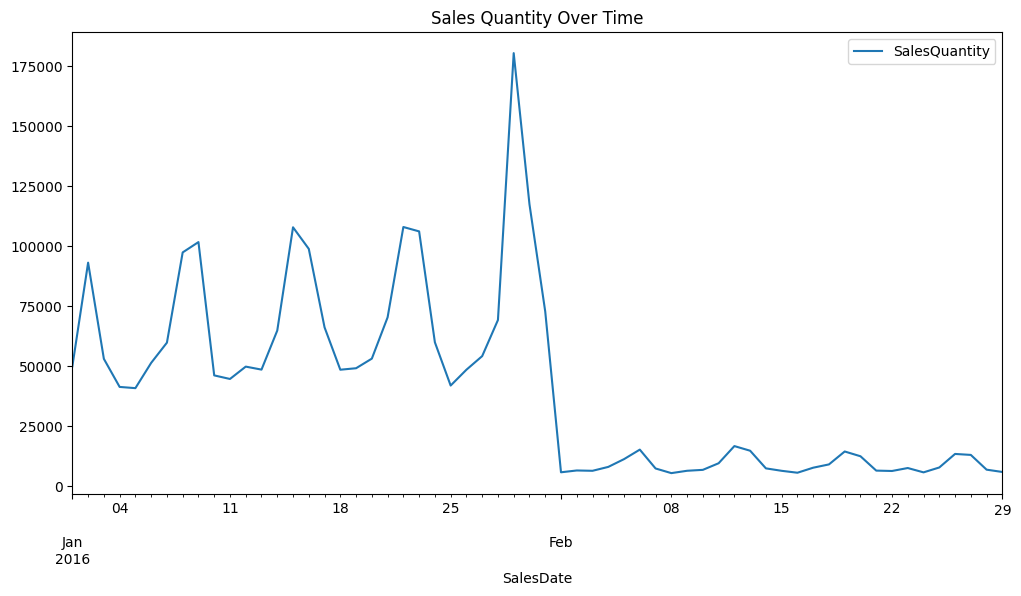

In [33]:
#Average quantity sold over time
sales_quantity_trend = sales.groupby('SalesDate').agg({'SalesQuantity': 'sum'})
sales_quantity_trend.plot(figsize=(12, 6), title='Sales Quantity Over Time')

<Axes: title={'center': 'Average Sales Price Over Time'}, xlabel='SalesDate'>

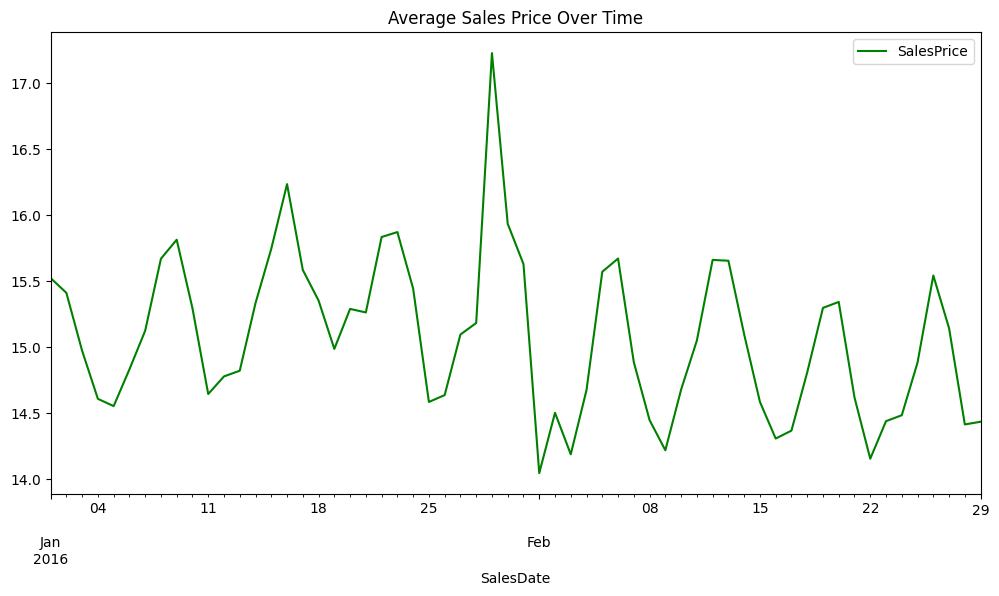

In [57]:
#Average Sales Price over time
avg_price_trend = sales.groupby('SalesDate').agg({'SalesPrice': 'mean'})
avg_price_trend.plot(figsize=(12, 6), title='Average Sales Price Over Time', color='g')

In [52]:
#Creating a 'Net Revenue' column (the difference between revenues and tax)
sales['Net Revenue'] = sales['SalesDollars'] - sales['ExciseTax']

<Axes: title={'center': 'Net revenues Over Time'}, xlabel='SalesDate'>

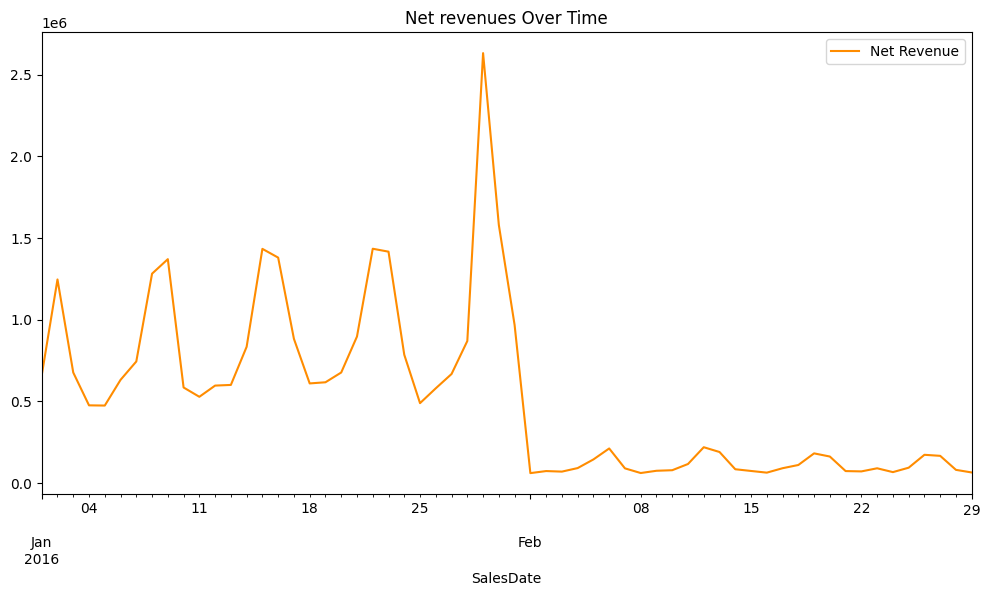

In [53]:
#Average revenues sold over time
net_revenues_trend = sales.groupby('SalesDate').agg({'Net Revenue': 'sum'})
net_revenues_trend.plot(figsize=(12, 6), title='Net revenues Over Time', color='darkorange')

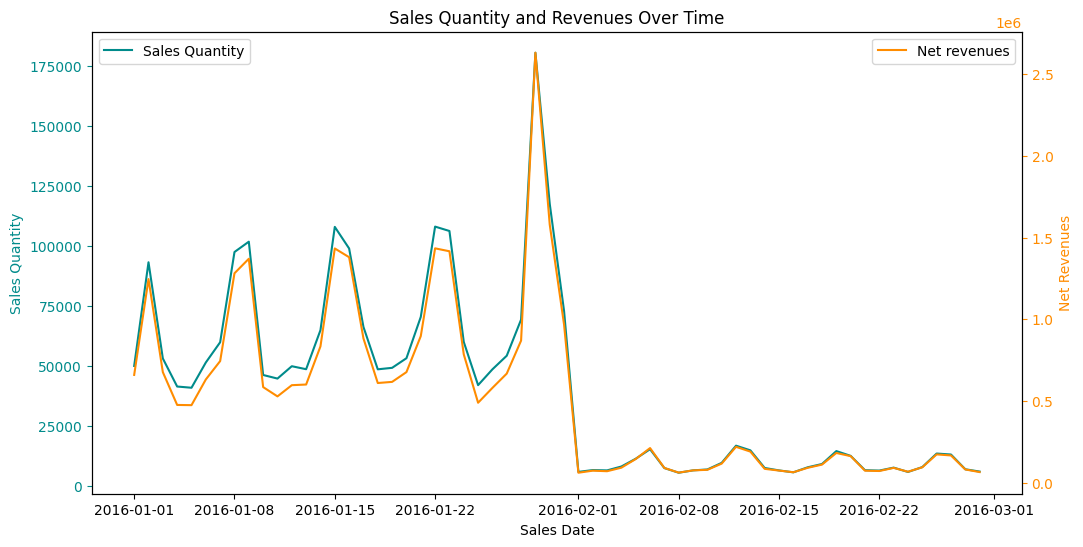

In [56]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Sales Quantity on the left y-axis (ax1)
ax1.plot(sales_quantity_trend.index, sales_quantity_trend['SalesQuantity'], color='darkcyan', label='Sales Quantity')
ax1.set_xlabel('Sales Date')
ax1.set_ylabel('Sales Quantity', color='darkcyan')
ax1.tick_params('y', colors='darkcyan')
ax1.legend(loc='upper left')

# Create a second y-axis on the right for Net Revenues (ax2)
ax2 = ax1.twinx()
ax2.plot(net_revenues_trend.index, net_revenues_trend['Net Revenue'], color='darkorange', label='Net revenues')
ax2.set_ylabel('Net Revenues', color='darkorange')
ax2.tick_params('y', colors='darkorange')
ax2.legend(loc='upper right')

plt.title('Sales Quantity and Revenues Over Time')
plt.show()

In [61]:
total_net_revenue = sales['Net Revenue'].sum()
total_net_revenue

31748076.639999993

In [71]:
#Best-selling products net revenue
best_selling_products_net_rev = sales.groupby(['Brand', 'Description']).agg({'Net Revenue': 'sum'}).sort_values(by='Net Revenue', ascending=False).head(10)
best_selling_products_net_rev['Unit Sold'] = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'})
best_selling_products_net_rev['Net Revenue %'] = (best_selling_products_net_rev['Net Revenue'] / total_net_revenue * 100).round(2)
best_selling_products_net_rev['Net Revenue per unit sold'] = (best_selling_products_net_rev['Net Revenue'] / best_selling_products_net_rev['Unit Sold'])
print(f"Top 10 best selling products net revenue:\n{best_selling_products_net_rev}\n")

Top 10 best selling products net revenue:
                                 Net Revenue  Unit Sold  Net Revenue %  \
Brand Description                                                        
4261  Capt Morgan Spiced Rum       407646.98      20226           1.28   
3545  Ketel One Vodka              335925.59      11883           1.06   
1233  Jack Daniels No 7 Black      327114.08       9578           1.03   
8068  Absolut 80 Proof             267577.14      11189           0.84   
3405  Tito's Handmade Vodka        258253.85       9203           0.81   
3858  Grey Goose Vodka             217630.53       9378           0.69   
2589  Jameson Irish Whiskey        183127.39       4649           0.58   
4227  Bacardi Superior Rum Trav    164902.05      10209           0.52   
2585  Jameson Irish Whiskey        158962.82       6940           0.50   
1376  Jim Beam                     156396.29       7362           0.49   

                                 Net Revenue per unit sold  
Brand De

In [74]:
#Slow-moving products net revenue
slow_moving_products_net_rev = sales.groupby(['Brand', 'Description']).agg({'Net Revenue': 'sum'}).sort_values(by='Net Revenue', ascending=True).head(10)
slow_moving_products_net_rev['Unit Sold'] = sales.groupby(['Brand', 'Description']).agg({'SalesQuantity': 'sum'})
slow_moving_products_net_rev['Net Revenue %'] = (slow_moving_products_net_rev['Net Revenue'] / total_net_revenue * 100).round(6)
slow_moving_products_net_rev['Net Revenue per unit sold'] = (slow_moving_products_net_rev['Net Revenue'] / total_net_revenue)
print(f"Bottom 10 slow-moving products net revenue:\n{slow_moving_products_net_rev}")

Bottom 10 slow-moving products net revenue:
                                   Net Revenue  Unit Sold  Net Revenue %  \
Brand Description                                                          
5287  Dr McGillicuddy's Vanilla           0.88          2       0.000003   
8872  Kru Peach Mango Vodka               0.94          1       0.000003   
3303  Smirnoff Light Lemon Sorbet         0.94          1       0.000003   
2773  Revel Stoke Roasted Pecan           0.94          1       0.000003   
3933  New Amsterdam Vodka                 1.88          2       0.000006   
8729  Smirnoff Light Strawberry           1.88          2       0.000006   
3623  Spud Potato Vodka                   1.88          2       0.000006   
3407  UV Sriracha Vodka                   1.88          2       0.000006   
2134  Canadian Ltd                        2.10          1       0.000007   
22407 Three Wishes Chard                  3.18          1       0.000010   

                                   Net Reve

**Purchasing Analysis**

In [81]:
invoice_purchases

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,None
...,...,...,...,...,...,...,...,...,...,...
5538,9622,WEIN BAUER INC,2017-01-06,13626,2016-12-21,2017-02-10,90,1563.00,8.60,None
5539,9625,WESTERN SPIRITS BEVERAGE CO,2017-01-10,13661,2016-12-23,2017-02-18,4617,37300.48,186.50,None
5540,3664,WILLIAM GRANT & SONS INC,2017-01-02,13643,2016-12-22,2017-02-04,9848,202815.78,932.95,None
5541,9815,WINE GROUP INC,2017-01-03,13602,2016-12-20,2017-02-08,24747,149007.56,819.54,None


In [75]:
#Top 10 vendors according to purchases
vendor_purchase_volume = invoice_purchases.groupby('VendorName').agg({'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
print("Top 10 Vendors by Purchase Volume:\n", vendor_purchase_volume.head(10))

Top 10 Vendors by Purchase Volume:
                              Quantity
VendorName                           
DIAGEO NORTH AMERICA INC      5459788
JIM BEAM BRANDS COMPANY       2737165
MARTIGNETTI COMPANIES         2637275
CONSTELLATION BRANDS INC      2325892
E & J GALLO WINERY            1858260
PERNOD RICARD USA             1647558
BACARDI USA INC               1427075
SAZERAC CO INC                1417727
M S WALKER INC                1372841
ULTRA BEVERAGE COMPANY LLP    1077527


In [103]:
purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification,SupplyDuration,PaymentDuration
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1,12,43
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1,10,45
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1,11,45
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1,10,45
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1,9,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372469,49_GARIGILL_22298,49,22298,Zorvino Vyds Sangiovese,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-28,2017-01-09,2017-02-06,8.06,12,96.72,2,9,28
2372470,1_HARDERSFIELD_19556,1,19556,Zorvino Bacca Z Blackberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-27,2017-01-09,2017-02-06,9.39,12,112.68,2,8,28
2372471,66_EANVERNESS_22297,66,22297,Zorvino Vyds Pearz,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,6.75,12,81.00,2,7,28
2372472,69_MOUNTMEND_19557,69,19557,Zorvino Fragole Z Strawberry,750mL,90058,ZORVINO VINEYARDS,13593,2016-12-19,2016-12-26,2017-01-09,2017-02-06,9.39,12,112.68,2,7,28


In [87]:
#Top 10 vendors by Total Purchase Cost
vendor_total_purchase_cost = purchases.groupby('VendorName').agg({'Dollars': 'sum'}).sort_values(by='Dollars', ascending=False)
print("Top 10 Vendors by Total purchase cost:\n", vendor_total_purchase_cost.head(10))

Top 10 Vendors by Total purchase cost:
                                  Dollars
VendorName                              
DIAGEO NORTH AMERICA INC     50959796.85
MARTIGNETTI COMPANIES        27821473.91
JIM BEAM BRANDS COMPANY      24203060.96
PERNOD RICARD USA            24124091.56
BACARDI USA INC              17624378.72
CONSTELLATION BRANDS INC     15573917.90
BROWN-FORMAN CORP            13529433.08
ULTRA BEVERAGE COMPANY LLP   13210613.93
E & J GALLO WINERY           12289608.09
M S WALKER INC               10935725.47


In [93]:
#Calculating Average Supply Duration (in days)

# Converting PODate and ReceivingDate columns to datetime
purchases['PODate'] = pd.to_datetime(purchases['PODate'], errors='coerce')
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'], errors='coerce')

# Checking if there are any null values after conversion
if purchases['PODate'].isnull().any() or purchases['ReceivingDate'].isnull().any():
    print("There are invalid date entries in the dataset. Please review the data.")
else:
    purchases['SupplyDuration'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
    average_supply_duration = purchases['SupplyDuration'].mean()
    print("Average Supply Duration (in days):", average_supply_duration)

Average Supply Duration (in days): 7.620737197630656


In [94]:
#Calculating Average Payment Duration (in days)

purchases['InvoiceDate'] = pd.to_datetime(purchases['InvoiceDate'])
purchases['PayDate'] = pd.to_datetime(purchases['PayDate'])
purchases['PaymentDuration'] = (purchases['PayDate'] - purchases['InvoiceDate']).dt.days

average_payment_duration = purchases['PaymentDuration'].mean()
print("Average Payment Duration (in days):", average_payment_duration)

Average Payment Duration (in days): 35.658806366863914


In [108]:
reduced_purchases = purchases[['VendorName', 'Quantity', 'Dollars']]
top_vendors = reduced_purchases.groupby('VendorName').agg({'Quantity': 'sum', 'Dollars': 'sum'}).nlargest(10, 'Dollars')
print(top_vendors)

                             Quantity      Dollars
VendorName                                        
DIAGEO NORTH AMERICA INC      5459788  50959796.85
MARTIGNETTI COMPANIES         2637275  27821473.91
JIM BEAM BRANDS COMPANY       2737152  24203060.96
PERNOD RICARD USA             1647558  24124091.56
BACARDI USA INC               1427075  17624378.72
CONSTELLATION BRANDS INC      2325892  15573917.90
BROWN-FORMAN CORP             1006122  13529433.08
ULTRA BEVERAGE COMPANY LLP    1077527  13210613.93
E & J GALLO WINERY            1858260  12289608.09
M S WALKER INC                1372840  10935725.47


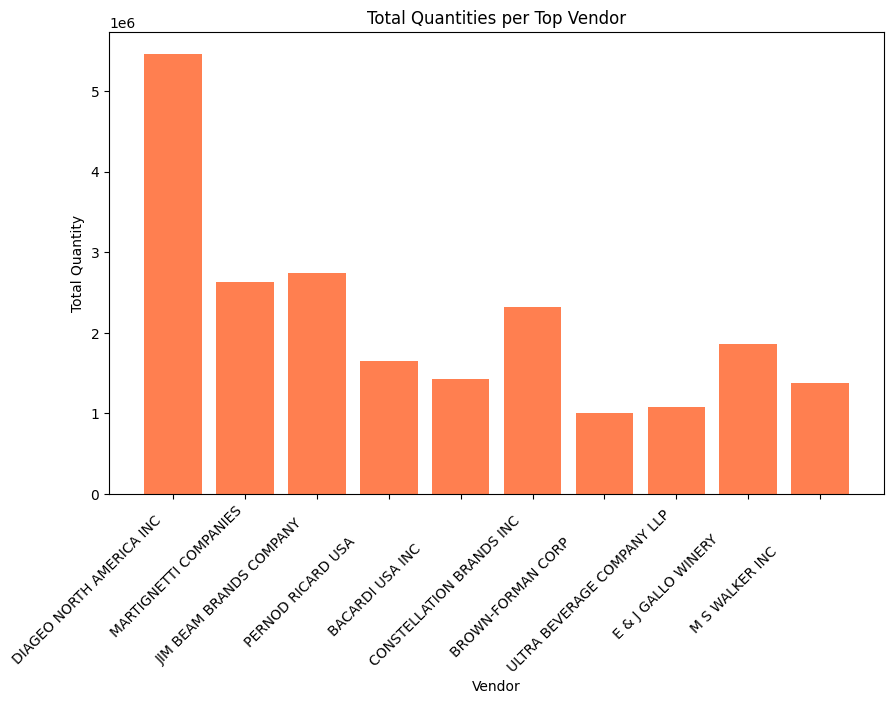

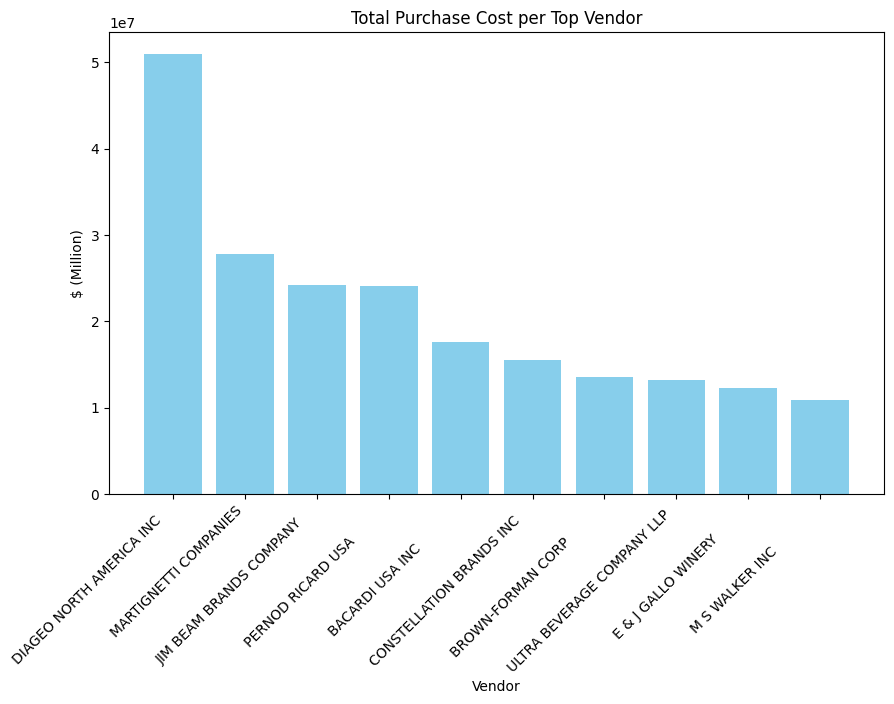

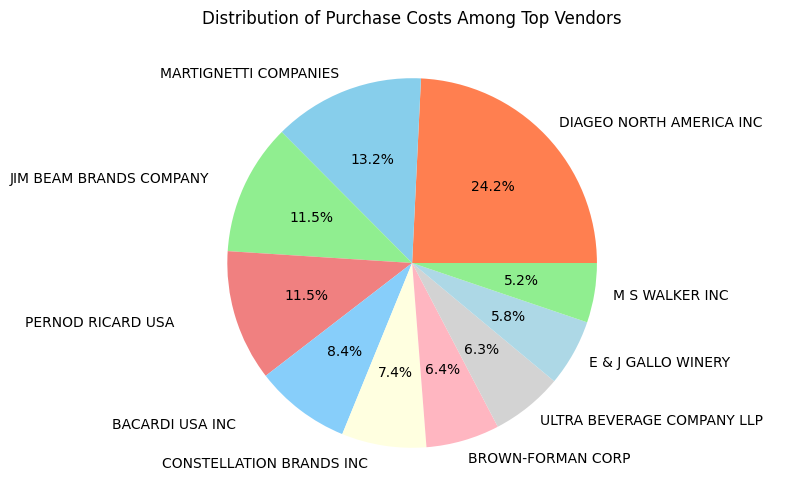

In [111]:
# Plot 1: Barplot of total quantities per top vendor
plt.figure(figsize=(10, 6))
plt.bar(top_vendors.index, top_vendors['Quantity'], color='coral')
plt.title('Total Quantities per Top Vendor')
plt.xlabel('Vendor')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

# Plot 2: Barplot of total purchase cost per top vendor
plt.figure(figsize=(10, 6))
plt.bar(top_vendors.index, top_vendors['Dollars'], color='skyblue')
plt.title('Total Purchase Cost per Top Vendor')
plt.xlabel('Vendor')
plt.ylabel('$ (Million)')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()

# Plot 3: Piechart for distribution of purchase costs among the top vendors
plt.figure(figsize=(10, 6))
plt.pie(top_vendors['Dollars'], labels=top_vendors.index, autopct='%1.1f%%', colors=['coral', 'skyblue', 'lightgreen', 'lightcoral', 'lightskyblue', 'lightyellow', 'lightpink', 'lightgrey', 'lightblue', 'lightgreen'])
plt.title('Distribution of Total Purchase Costs Among Top Vendors')
plt.show()

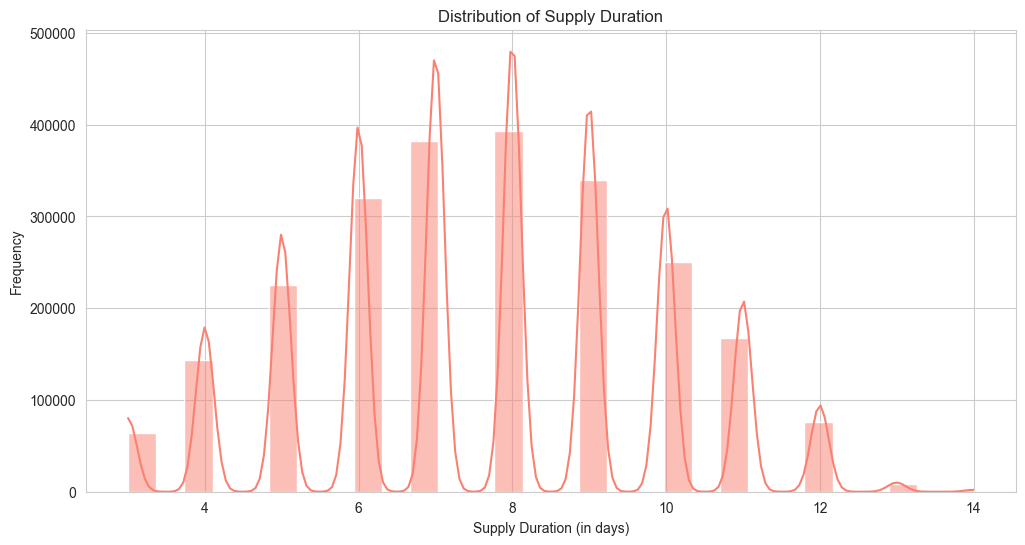

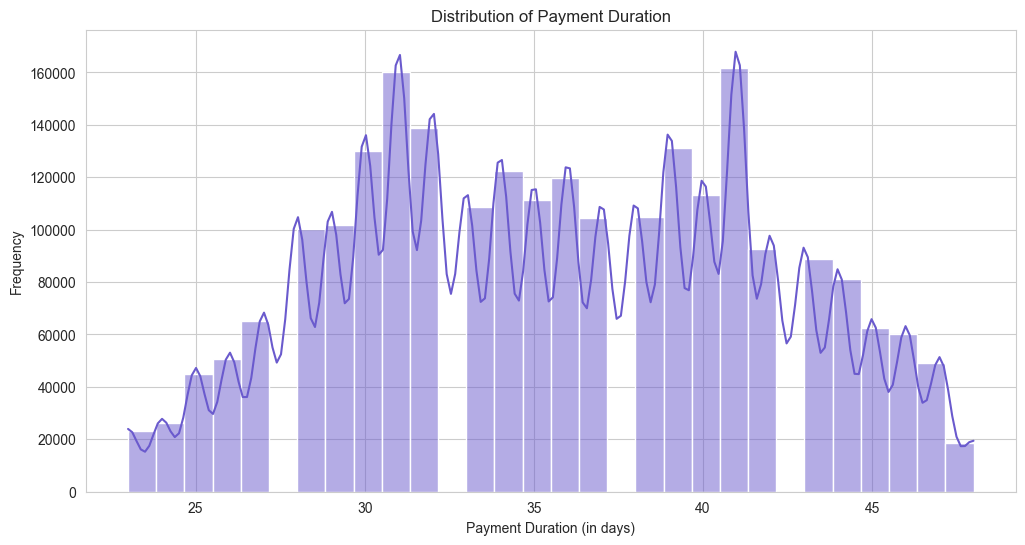

In [114]:
# Style settings
sns.set_style("whitegrid")

mint_green_color = '#98FB98'
slate_blue_color = '#6A5ACD'
salmon_color = '#FA8072'

# Histogram for Supply Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['SupplyDuration'], kde=True, bins=30, color=salmon_color)
plt.title('Distribution of Supply Duration')
plt.xlabel('Supply Duration (in days)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Payment Duration
plt.figure(figsize=(12, 6))
sns.histplot(purchases['PaymentDuration'], kde=True, bins=30, color=slate_blue_color)
plt.title('Distribution of Payment Duration')
plt.xlabel('Payment Duration (in days)')
plt.ylabel('Frequency')
plt.show()

In [115]:
start_date = sales['SalesDate'].min()
end_date = sales['SalesDate'].max()
total_days = (end_date - start_date).days

In [117]:
# Calculating Sales Velocity for each product
sales_velocity = sales.groupby(['Brand', 'Description']).agg(Total_Sales=('SalesQuantity', 'sum')).reset_index()
sales_velocity['Sales_Per_Day'] = sales_velocity['Total_Sales'] / total_days
sales_velocity

,Brand,Description,Total_Sales,Sales_Per_Day
0,58,Gekkeikan Black & Gold Sake,288,4.881356
1,60,Canadian Club 1858 VAP,124,2.101695
2,61,Margaritaville Silver,24,0.406780
3,62,Herradura Silver Tequila,162,2.745763
4,63,Herradura Reposado Tequila,131,2.220339
...,...,...,...,...
7653,90084,Les Fiefs Lagrange St Jul 11,2,0.033898
7654,90085,Ch Lilian 09 Ladouys St Este,2,0.033898
7655,90086,La Dame Montrose St Estep 11,1,0.016949
7656,90087,Ch Mouton Rothschild 12 Paui,1,0.016949


In [118]:
purchases.loc[:, 'Lead_Time'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
lead_times = purchases.groupby(['Brand', 'Description']).agg(Avg_Lead_Time=('Lead_Time', 'mean')).reset_index()
lead_times 

,Brand,Description,Avg_Lead_Time
0,58,Gekkeikan Black & Gold Sake,7.758389
1,60,Canadian Club 1858 VAP,7.659794
2,61,Margaritaville Silver,8.115385
3,62,Herradura Silver Tequila,7.331570
4,63,Herradura Reposado Tequila,7.324427
...,...,...,...
10658,90089,Ch Lynch Bages 12 Pauillac,7.333333
10659,90090,Ch Lafite Rothschild 12,4.500000
10660,90604,Ch Lynch Bages Pauilac,7.384615
10661,90609,Flavor Essence Variety 5 Pak,10.363636


In [119]:
# Merging the data
merged_data = pd.merge(sales_velocity, lead_times, on=['Brand', 'Description'], how='left')

# Calculating Optimal Stock Level
merged_data['Optimal_Stock_Level'] = merged_data['Sales_Per_Day'] * merged_data['Avg_Lead_Time']

merged_data

,Brand,Description,Total_Sales,Sales_Per_Day,Avg_Lead_Time,Optimal_Stock_Level
0,58,Gekkeikan Black & Gold Sake,288,4.881356,7.758389,37.871459
1,60,Canadian Club 1858 VAP,124,2.101695,7.659794,16.098550
2,61,Margaritaville Silver,24,0.406780,8.115385,3.301173
3,62,Herradura Silver Tequila,162,2.745763,7.331570,20.130751
4,63,Herradura Reposado Tequila,131,2.220339,7.324427,16.262712
...,...,...,...,...,...,...
7653,90084,Les Fiefs Lagrange St Jul 11,2,0.033898,NaN,NaN
7654,90085,Ch Lilian 09 Ladouys St Este,2,0.033898,8.000000,0.271186
7655,90086,La Dame Montrose St Estep 11,1,0.016949,9.000000,0.152542
7656,90087,Ch Mouton Rothschild 12 Paui,1,0.016949,4.800000,0.081356


In [120]:
# Calculating Safety Stock using maximum sales for each product
max_sales = sales.groupby(['Brand', 'Description']).agg(Max_Daily_Sales=('SalesQuantity', 'max')).reset_index()
merged_data = pd.merge(merged_data, max_sales, on=['Brand', 'Description'], how='left')

merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']
merged_data

,Brand,Description,Total_Sales,Sales_Per_Day,Avg_Lead_Time,Optimal_Stock_Level,Max_Daily_Sales,Safety_Stock,Recommended_Stock_Level
0,58,Gekkeikan Black & Gold Sake,288,4.881356,7.758389,37.871459,7,2.118644,39.990104
1,60,Canadian Club 1858 VAP,124,2.101695,7.659794,16.098550,3,0.898305,16.996855
2,61,Margaritaville Silver,24,0.406780,8.115385,3.301173,12,11.593220,14.894394
3,62,Herradura Silver Tequila,162,2.745763,7.331570,20.130751,3,0.254237,20.384988
4,63,Herradura Reposado Tequila,131,2.220339,7.324427,16.262712,4,1.779661,18.042373
...,...,...,...,...,...,...,...,...,...
7653,90084,Les Fiefs Lagrange St Jul 11,2,0.033898,NaN,NaN,1,0.966102,NaN
7654,90085,Ch Lilian 09 Ladouys St Este,2,0.033898,8.000000,0.271186,2,1.966102,2.237288
7655,90086,La Dame Montrose St Estep 11,1,0.016949,9.000000,0.152542,1,0.983051,1.135593
7656,90087,Ch Mouton Rothschild 12 Paui,1,0.016949,4.800000,0.081356,1,0.983051,1.064407


In [121]:
# Filtering products where Sales_Per_Day value is greater than Max_Daily_Sales value
problematic_products = merged_data[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales']]

# Getting the number of problematic products
num_problematic_products = len(problematic_products)

# Printing problematic products to the screen
print(f"There are {num_problematic_products} products where the Sales_Per_Day value is greater than the Max_Daily_Sales value.")
if num_problematic_products > 0:
    print(problematic_products[['Brand', 'Description', 'Sales_Per_Day', 'Max_Daily_Sales']])

There are 555 products where the Sales_Per_Day value is greater than the Max_Daily_Sales value.
      Brand                   Description  Sales_Per_Day  Max_Daily_Sales
7        77   Three Olives Espresso Vodka      15.389831                8
8        79      Three Olives Loopy Vodka       7.050847                5
76      273      Sauza Extra Gold Tequila      10.372881                9
139     482              Absolut 80 Proof      37.135593               23
142     497        Capt Morgan Spiced Rum      39.644068               38
...     ...                           ...            ...              ...
7426  44712    Sonoma-Cutrer Chard Sonoma      27.610169               25
7580  46379  Ghost Pine Cab Svgn LMartini      14.474576               12
7590  46447         Gascon Malbec Mendoza      22.796610               16
7592  46458      Layer Cake Barosa Shiraz       7.305085                7
7594  46476          Tilia Malbec Mendoza      26.169492               19

[555 rows x 4 c

In [123]:
# Updating Max_Daily_Sales for problematic products
merged_data.loc[merged_data['Sales_Per_Day'] > merged_data['Max_Daily_Sales'], 'Max_Daily_Sales'] = merged_data['Sales_Per_Day']

# Updating Safety Stock and Recommended Stock Level after modifying Max_Daily_Sales
merged_data['Safety_Stock'] = merged_data['Max_Daily_Sales'] - merged_data['Sales_Per_Day']
merged_data['Recommended_Stock_Level'] = merged_data['Optimal_Stock_Level'] + merged_data['Safety_Stock']
merged_data

,Brand,Description,Total_Sales,Sales_Per_Day,Avg_Lead_Time,Optimal_Stock_Level,Max_Daily_Sales,Safety_Stock,Recommended_Stock_Level
0,58,Gekkeikan Black & Gold Sake,288,4.881356,7.758389,37.871459,7.0,2.118644,39.990104
1,60,Canadian Club 1858 VAP,124,2.101695,7.659794,16.098550,3.0,0.898305,16.996855
2,61,Margaritaville Silver,24,0.406780,8.115385,3.301173,12.0,11.593220,14.894394
3,62,Herradura Silver Tequila,162,2.745763,7.331570,20.130751,3.0,0.254237,20.384988
4,63,Herradura Reposado Tequila,131,2.220339,7.324427,16.262712,4.0,1.779661,18.042373
...,...,...,...,...,...,...,...,...,...
7653,90084,Les Fiefs Lagrange St Jul 11,2,0.033898,NaN,NaN,1.0,0.966102,NaN
7654,90085,Ch Lilian 09 Ladouys St Este,2,0.033898,8.000000,0.271186,2.0,1.966102,2.237288
7655,90086,La Dame Montrose St Estep 11,1,0.016949,9.000000,0.152542,1.0,0.983051,1.135593
7656,90087,Ch Mouton Rothschild 12 Paui,1,0.016949,4.800000,0.081356,1.0,0.983051,1.064407


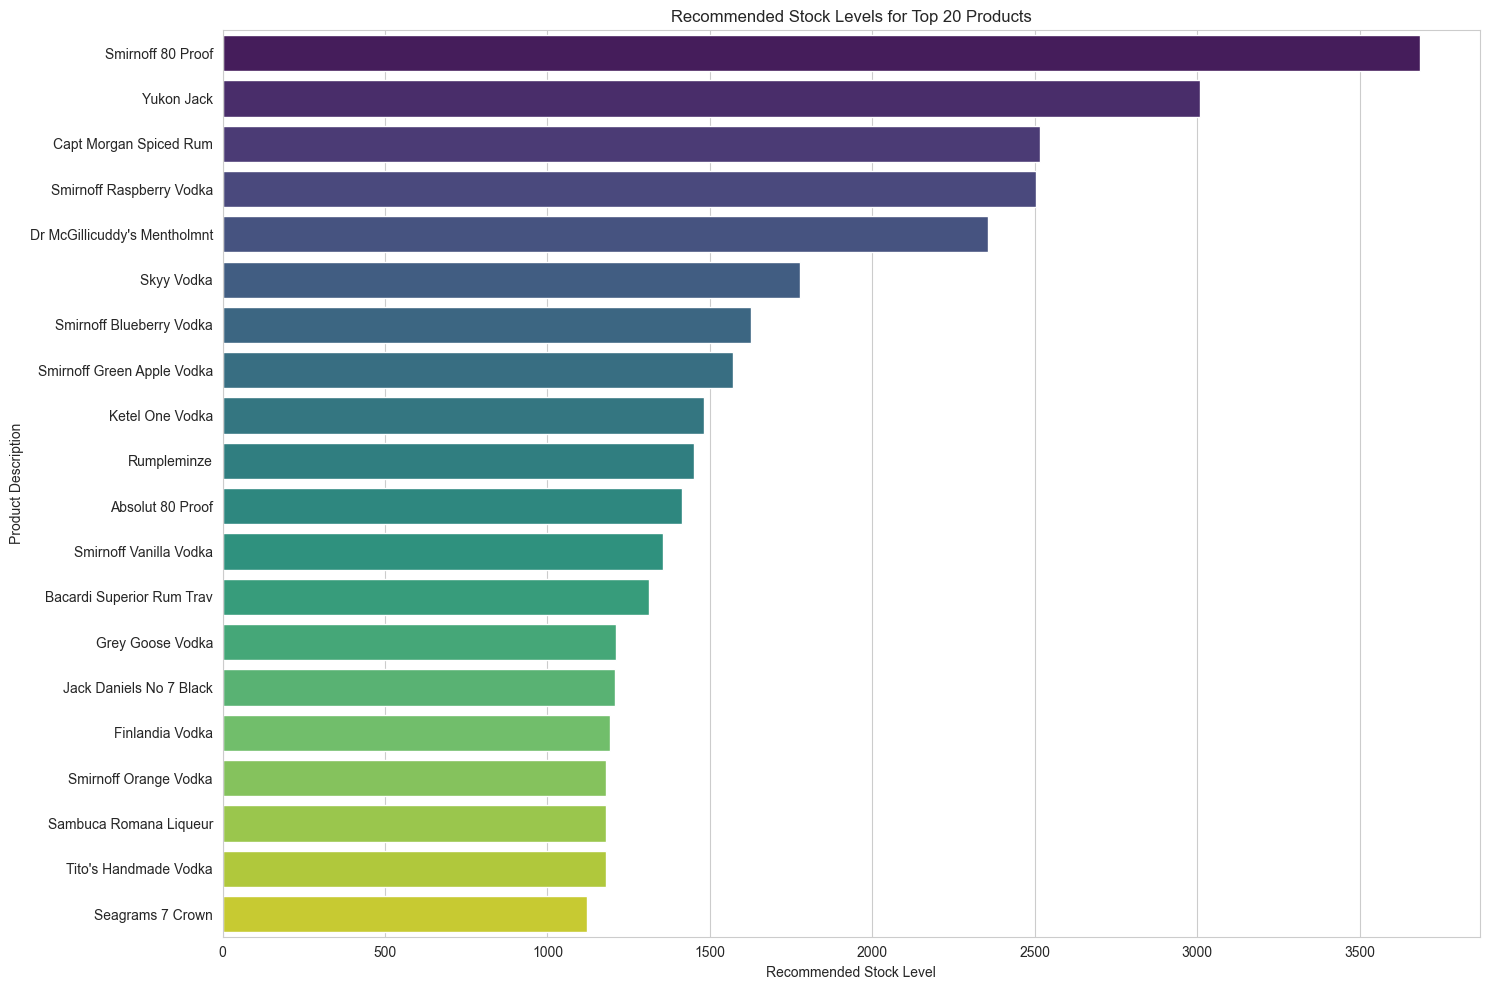

In [124]:
# Sorting the data by Recommended_Stock_Level for better visualization
sorted_data = merged_data.sort_values(by='Recommended_Stock_Level', ascending=False)

# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='Recommended_Stock_Level', y='Description', data=sorted_data.head(20), palette='viridis')  # showing top 20 products for better visualization
plt.xlabel('Recommended Stock Level')
plt.ylabel('Product Description')
plt.title('Recommended Stock Levels for Top 20 Products')
plt.tight_layout()
plt.show()

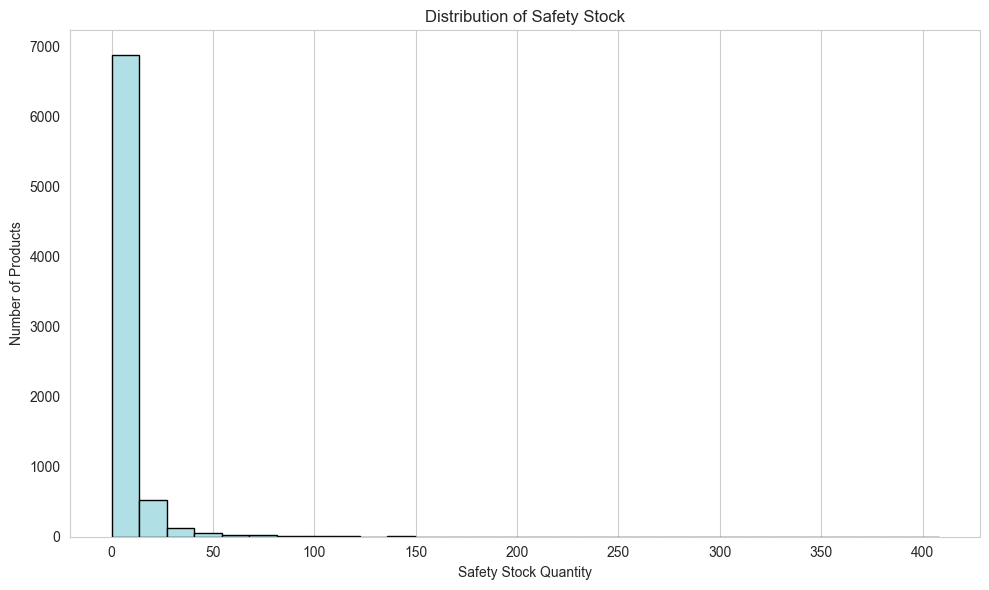

In [126]:
# Plotting the histogram for Safety Stock distribution
plt.figure(figsize=(10,6))
plt.hist(merged_data['Safety_Stock'], bins=30, color='PowderBlue', edgecolor='black')
plt.title('Distribution of Safety Stock')
plt.xlabel('Safety Stock Quantity')
plt.ylabel('Number of Products')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

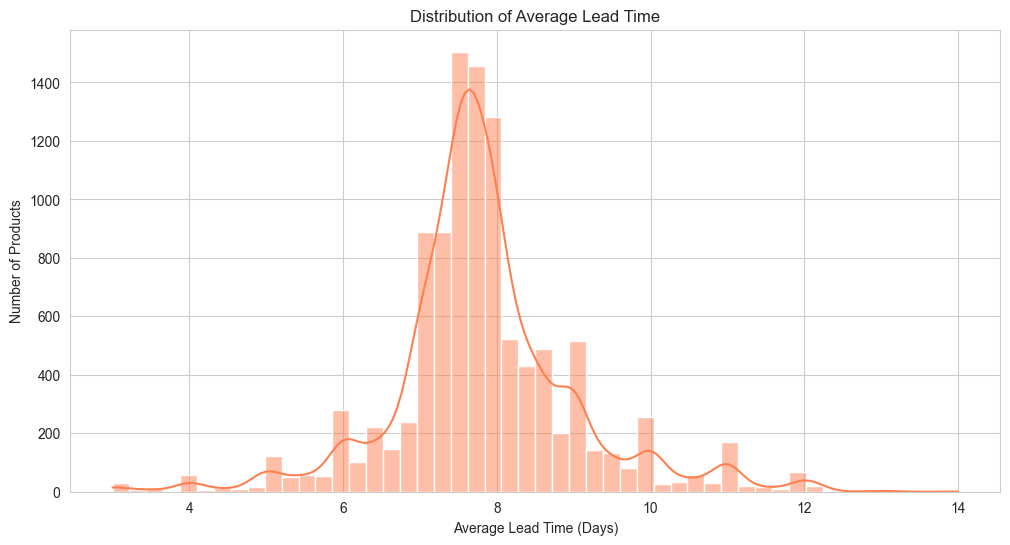

In [127]:
# Styling
sns.set_style("whitegrid")

# Creating the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=lead_times, x='Avg_Lead_Time', bins=50, color='coral', kde=True)
plt.title('Distribution of Average Lead Time')
plt.xlabel('Average Lead Time (Days)')
plt.ylabel('Number of Products')
plt.show()

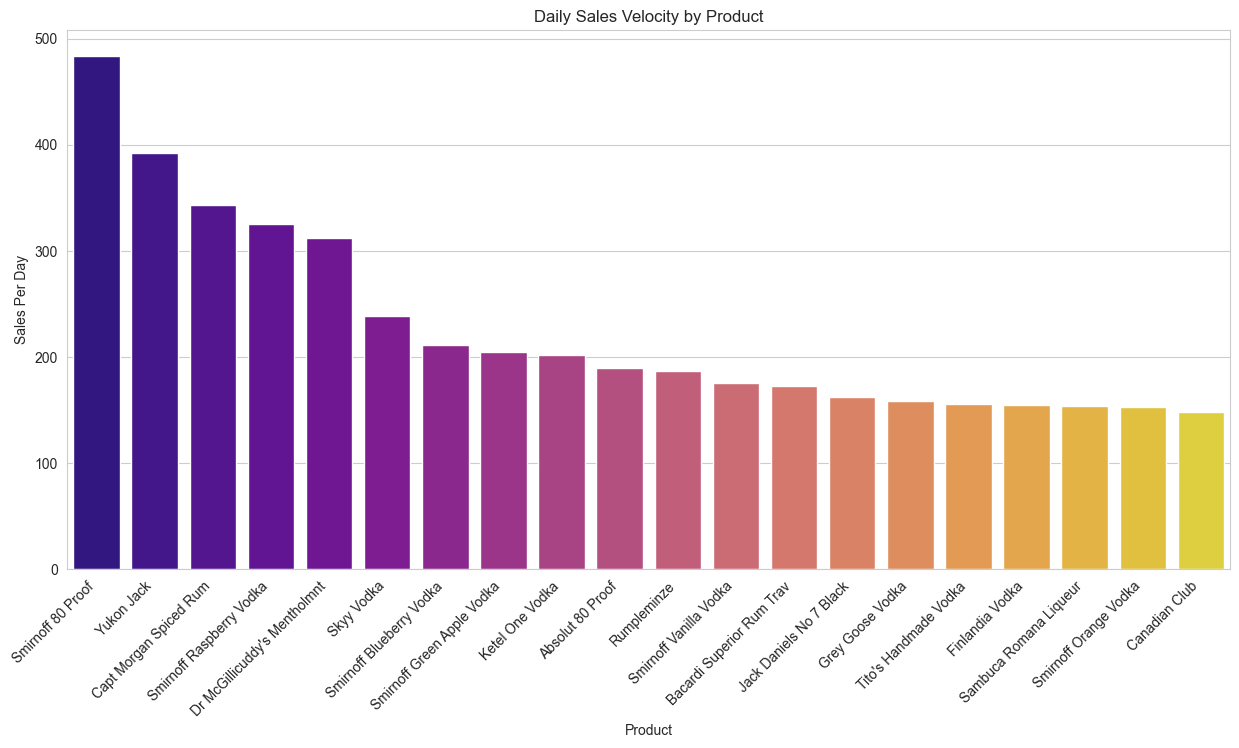

In [129]:
# Sorting the data by Sales_Per_Day in descending order to get top products
top_products = sales_velocity.sort_values(by='Sales_Per_Day', ascending=False).head(20)  # you can adjust the number as needed

# Creating the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Description', y='Sales_Per_Day', data=top_products, palette='plasma')
plt.xticks(rotation=45, ha='right')
plt.title('Daily Sales Velocity by Product')
plt.xlabel('Product')
plt.ylabel('Sales Per Day')
plt.show()

**Optimal Stock Level Calculation**

In [130]:
end_inv['endDate'] = pd.to_datetime(end_inv['endDate'])
latest_inventory_date = end_inv['endDate'].max()
current_inventory = end_inv[end_inv['endDate'] == latest_inventory_date]
current_inventory

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31
...,...,...,...,...,...,...,...,...,...
224484,81_PEMBROKE_90087,81,PEMBROKE,90087,Ch Mouton Rothschild 12 Paui,750mL,3,469.99,2016-12-31
224485,81_PEMBROKE_90088,81,PEMBROKE,90088,Ch Le Petite Mouton 12 Pauil,750mL,3,134.99,2016-12-31
224486,81_PEMBROKE_90089,81,PEMBROKE,90089,Ch Lynch Bages 12 Pauillac,750mL,3,119.99,2016-12-31
224487,81_PEMBROKE_90090,81,PEMBROKE,90090,Ch Lafite Rothschild 12,750mL,3,649.99,2016-12-31


In [132]:
# Summarizing the current stock levels by product.
current_stock_levels = current_inventory.groupby(['Brand', 'Description']).agg(Current_Stock=('onHand', 'sum')).reset_index()
current_stock_levels

,Brand,Description,Current_Stock
0,58,Gekkeikan Black & Gold Sake,385
1,60,Canadian Club 1858 VAP,146
2,61,Margaritaville Silver,12
3,62,Herradura Silver Tequila,459
4,63,Herradura Reposado Tequila,442
...,...,...,...
9648,90089,Ch Lynch Bages 12 Pauillac,124
9649,90090,Ch Lafite Rothschild 12,42
9650,90604,Ch Lynch Bages Pauilac,42
9651,90609,Flavor Essence Variety 5 Pak,238


In [133]:
# Merging the current stock levels with the previously calculated data.
final_data = pd.merge(merged_data, current_stock_levels, on=['Brand', 'Description'], how='left')
final_data

,Brand,Description,Total_Sales,Sales_Per_Day,Avg_Lead_Time,Optimal_Stock_Level,Max_Daily_Sales,Safety_Stock,Recommended_Stock_Level,Current_Stock
0,58,Gekkeikan Black & Gold Sake,288,4.881356,7.758389,37.871459,7.0,2.118644,39.990104,385.0
1,60,Canadian Club 1858 VAP,124,2.101695,7.659794,16.098550,3.0,0.898305,16.996855,146.0
2,61,Margaritaville Silver,24,0.406780,8.115385,3.301173,12.0,11.593220,14.894394,12.0
3,62,Herradura Silver Tequila,162,2.745763,7.331570,20.130751,3.0,0.254237,20.384988,459.0
4,63,Herradura Reposado Tequila,131,2.220339,7.324427,16.262712,4.0,1.779661,18.042373,442.0
...,...,...,...,...,...,...,...,...,...,...
7653,90084,Les Fiefs Lagrange St Jul 11,2,0.033898,NaN,NaN,1.0,0.966102,NaN,2.0
7654,90085,Ch Lilian 09 Ladouys St Este,2,0.033898,8.000000,0.271186,2.0,1.966102,2.237288,6.0
7655,90086,La Dame Montrose St Estep 11,1,0.016949,9.000000,0.152542,1.0,0.983051,1.135593,32.0
7656,90087,Ch Mouton Rothschild 12 Paui,1,0.016949,4.800000,0.081356,1.0,0.983051,1.064407,45.0


In [139]:
# Assume zero current stock for any products not present in the current inventory.
final_data['Current_Stock'] = final_data['Current_Stock'].fillna(0)

In [140]:
# Calculating how much of each product needs to be ordered if current stock is below recommended levels.
final_data['Order_Quantity'] = final_data['Recommended_Stock_Level'] - final_data['Current_Stock']
final_data['Order_Quantity'] = final_data['Order_Quantity'].clip(lower=0)  # Setting negative order quantities to zero

final_data[['Brand', 'Description', 'Current_Stock', 'Recommended_Stock_Level', 'Order_Quantity']]

,Brand,Description,Current_Stock,Recommended_Stock_Level,Order_Quantity
0,58,Gekkeikan Black & Gold Sake,385.0,39.990104,0.000000
1,60,Canadian Club 1858 VAP,146.0,16.996855,0.000000
2,61,Margaritaville Silver,12.0,14.894394,2.894394
3,62,Herradura Silver Tequila,459.0,20.384988,0.000000
4,63,Herradura Reposado Tequila,442.0,18.042373,0.000000
...,...,...,...,...,...
7653,90084,Les Fiefs Lagrange St Jul 11,2.0,NaN,NaN
7654,90085,Ch Lilian 09 Ladouys St Este,6.0,2.237288,0.000000
7655,90086,La Dame Montrose St Estep 11,32.0,1.135593,0.000000
7656,90087,Ch Mouton Rothschild 12 Paui,45.0,1.064407,0.000000


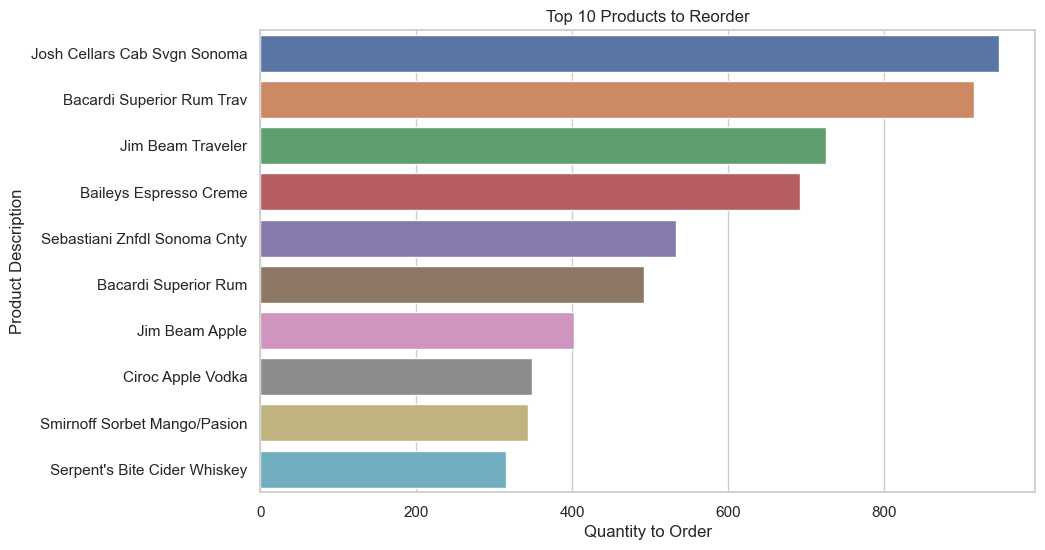

In [141]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Quantity', y='Description', data=final_data.sort_values('Order_Quantity', ascending=False).head(10))
plt.title('Top 10 Products to Reorder')
plt.xlabel('Quantity to Order')
plt.ylabel('Product Description')
plt.show()

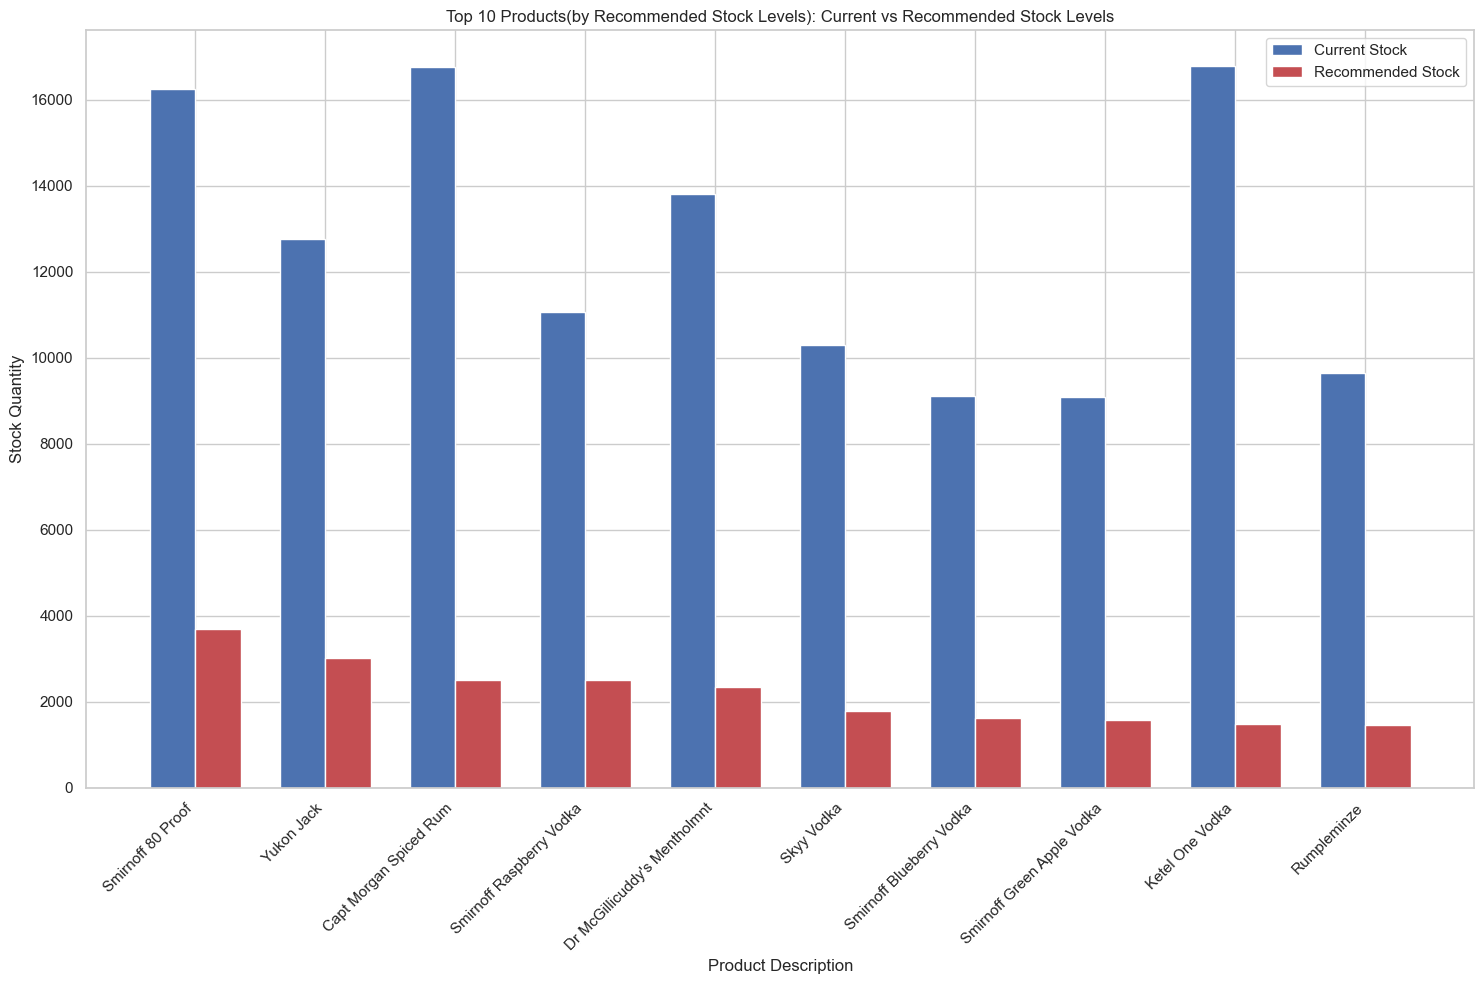

In [142]:
# Sorting the products by recommended stock level
sorted_data = final_data.sort_values(by='Recommended_Stock_Level', ascending=False).head(10)  # To show the top 10 products

# Creating a double-column bar chart
bar_width = 0.35
index = np.arange(len(sorted_data))

plt.figure(figsize=(15, 10))
bar1 = plt.bar(index, sorted_data['Current_Stock'], bar_width, label='Current Stock', color='b')
bar2 = plt.bar([i + bar_width for i in index], sorted_data['Recommended_Stock_Level'], bar_width, label='Recommended Stock', color='r')

# Setting the labels and title
plt.xlabel('Product Description')
plt.ylabel('Stock Quantity')
plt.title('Top 10 Products(by Recommended Stock Levels): Current vs Recommended Stock Levels')
plt.xticks([i + bar_width / 2 for i in index], sorted_data['Description'], rotation=45, ha='right')
plt.legend()

# Displaying the chart
plt.tight_layout()
plt.show()

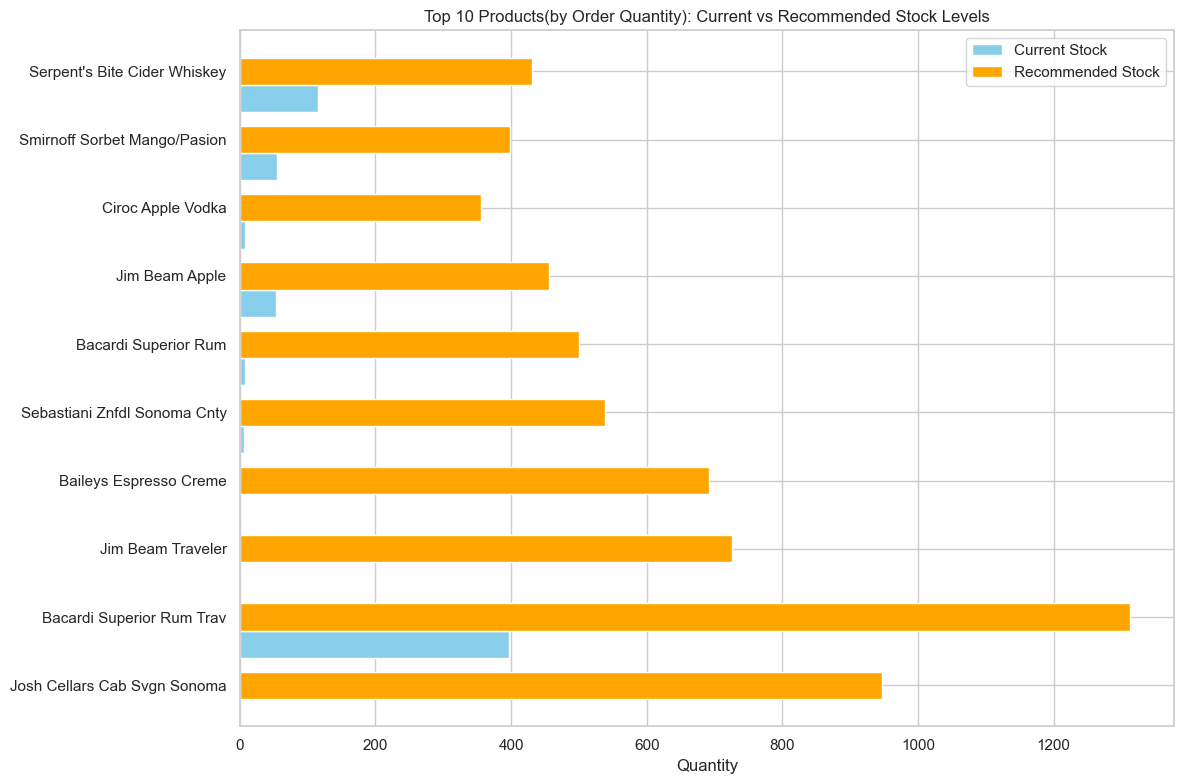

In [143]:
# Filtering the data to show the top 10 products where the ordering quantity is highest
top_products_to_order = final_data.nlargest(10, 'Order_Quantity')

# Plotting the bars
fig, ax = plt.subplots(figsize=(12, 8))

# Indexing for the bars
ind = np.arange(len(top_products_to_order))

# Width of the bars
bar_width = 0.4

# Plotting current stock and recommended stock side by side
ax.barh(ind, top_products_to_order['Current_Stock'], bar_width, color='skyblue', label='Current Stock')
ax.barh([i + bar_width for i in ind], top_products_to_order['Recommended_Stock_Level'], bar_width, color='orange', label='Recommended Stock')

# Setting the y-axis labels to product descriptions
ax.set(yticks=[i + bar_width for i in ind], yticklabels=top_products_to_order['Description'], ylim=[2 * bar_width - 1, len(ind)])

# Adding the legend
ax.legend()

# Adding labels and title
ax.set_xlabel('Quantity')
ax.set_title('Top 10 Products(by Order Quantity): Current vs Recommended Stock Levels')

# Display the plot
plt.tight_layout()
plt.show()